In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(12,8)})

In [289]:
train_data = pd.read_excel('Data_Train.xlsx')

In [290]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [189]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [190]:
train_data.shape

(10683, 11)

In [ ]:
# We have only 1 null value in some of the columns, we can safely drop them

In [291]:
train_data.dropna(inplace=True)

In [292]:
train_data.shape

(10682, 11)

### Data Analysis

In [ ]:
# We have a lot of columns which are of string type

In [20]:
# Duration column will not yeild a good prediction, we 

train_data['Duration'].nunique()

368

In [21]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [293]:
# Date_of_Journey is the date when the airplane is scheduled to take off
# extracting day and month from the Date_of_Journey column and then removing the column

train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [294]:
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [295]:
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [296]:
# Dep_Time is when the airplane departs the airport to fly to the destination
# similarly for Dep_Time column, extract hours and mins

train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

In [297]:
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

In [298]:
# drop Dep_Time column

train_data.drop('Dep_Time', axis=1, inplace=True)

In [ ]:
# Arrival_Time is when the airplane arrives at the destination airport
# Extract hour and mins from the arrival 

In [299]:
# for x in train_data['Arrival_Time']:
#      print(x.rsplit(' ',2)[0])
    
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

In [300]:
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [301]:
train_data.drop('Arrival_Time', axis=1, inplace=True)

In [302]:
# Duration is the total time taken for the journey
# The values in Duration are in hours and minutes but in string format. 
# Extract Hours and Mins from Duration column

duration_list = list(train_data['Duration'])

for i in range(len(duration_list)):
    if len(duration_list[i].split()) != 2:
        if 'h' in duration_list[i]:
            duration_list[i] = duration_list[i].strip() + ' 0m'
        else:
            duration_list[i] = '0h ' + duration_list[i]
            
duration_hours = []
duration_mins = []

for i in range(len(duration_list)):
    duration_hours.append(int(duration_list[i].split(sep='h')[0]))
    duration_mins.append(int(duration_list[i].split(sep = "m")[0].split()[-1]))


In [303]:
train_data['Duration_hours'] = duration_hours
train_data['Duration_mins'] = duration_mins

In [304]:
train_data.drop('Duration', axis=1, inplace=True)

### Categorical Variables

1. **Nominal categorical variables** = do not have any specific order


2. **Ordinal categorical variables** = have a particular order

In [231]:
# Checking the remaining variables

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_day      10682 non-null  int64 
 8   Journey_month    10682 non-null  int64 
 9   Dep_hour         10682 non-null  int64 
 10  Dep_min          10682 non-null  int64 
 11  Arrival_hour     10682 non-null  int64 
 12  Arrival_min      10682 non-null  int64 
 13  Duration_hours   10682 non-null  int64 
 14  Duration_mins    10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


In [230]:
# Explore Airline, Source, Destination, Route, Total_stops, Additional_Info

train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

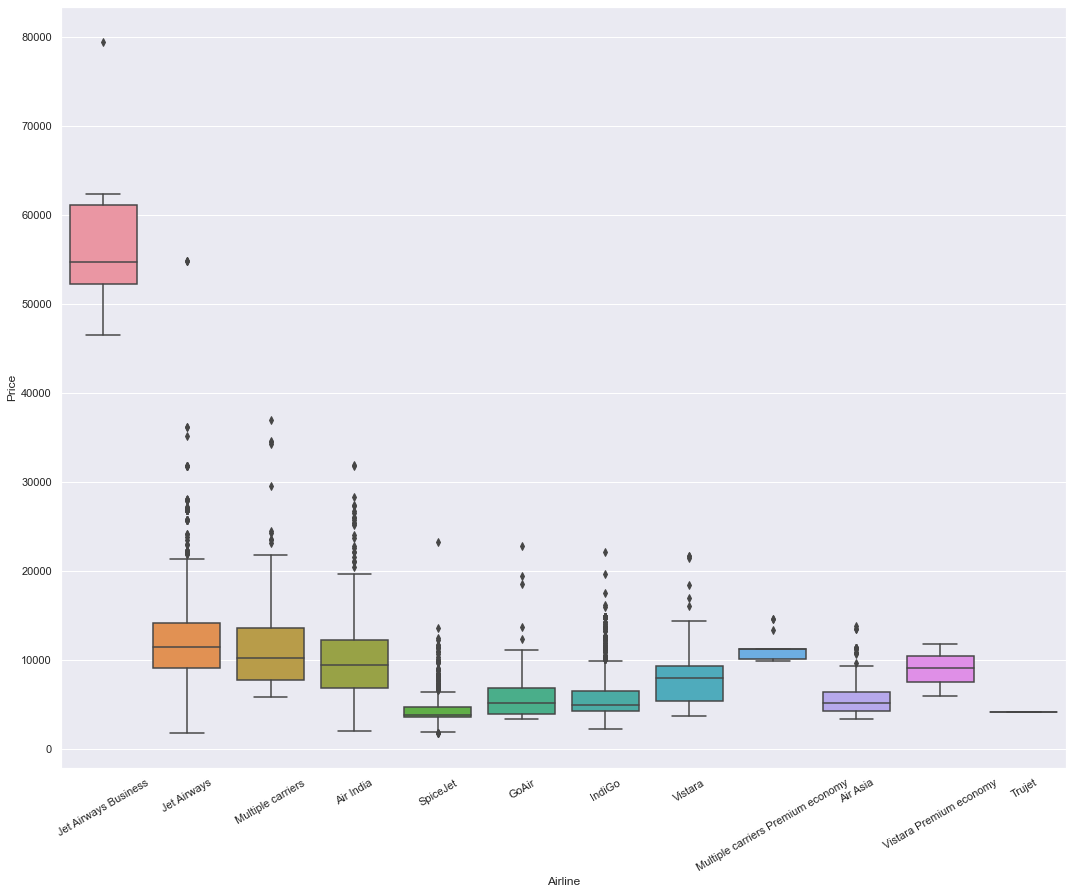

In [269]:
# plot all the value counts from Airline column against Price to see the prices for each airlines

plt.figure(figsize=(18,14))
sns.boxplot(x='Airline', y='Price', data=train_data.sort_values('Price', ascending=False))
plt.xticks(rotation = 30)
plt.show()

In [305]:
# Apply one hot encoding to Airline Column and drop the first one

Airline = pd.get_dummies(train_data['Airline'], drop_first=True)

In [272]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [232]:
# Check the number of values in the Source column to determing which encoding to apply

train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

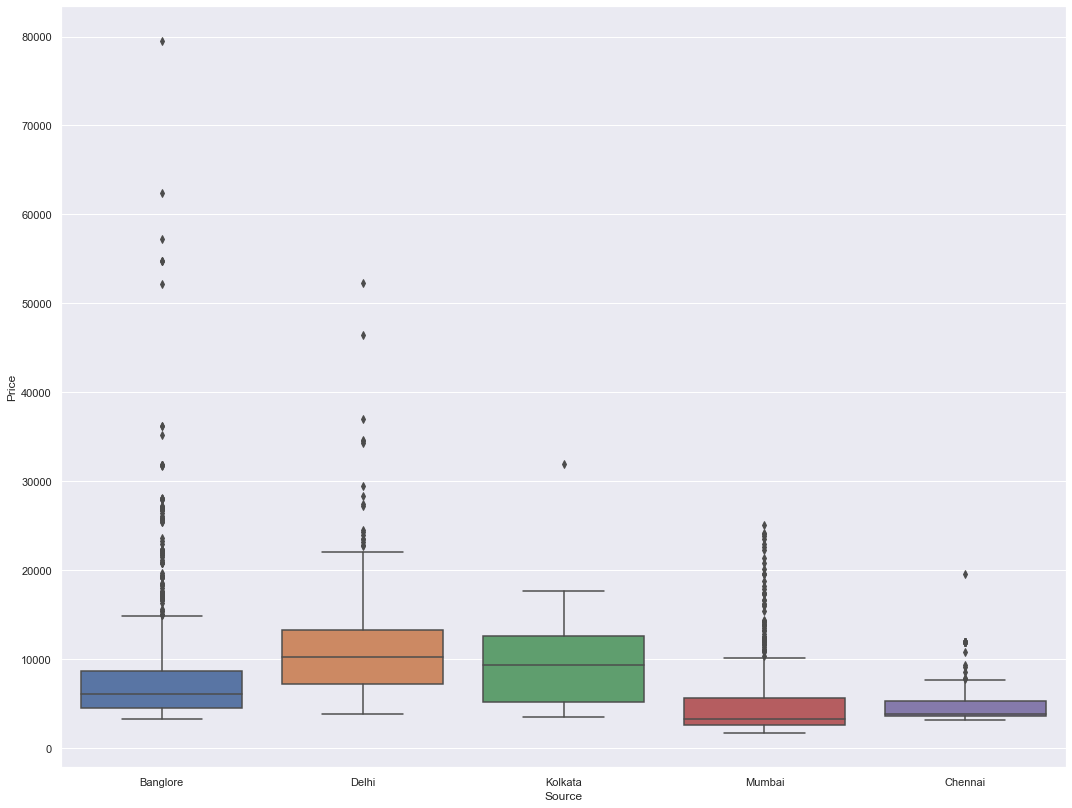

In [266]:
# plot all the value counts from Source column against Price to see the prices for each source value

plt.figure(figsize=(18,14))
sns.boxplot(x='Source', y='Price', data=train_data.sort_values('Price', ascending=False))

In [306]:
# Since it is nominal categorical variable, lets use one hot encoding

Source = pd.get_dummies(train_data['Source'], drop_first=True)

In [307]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [276]:
# Similarly for Destination column

train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

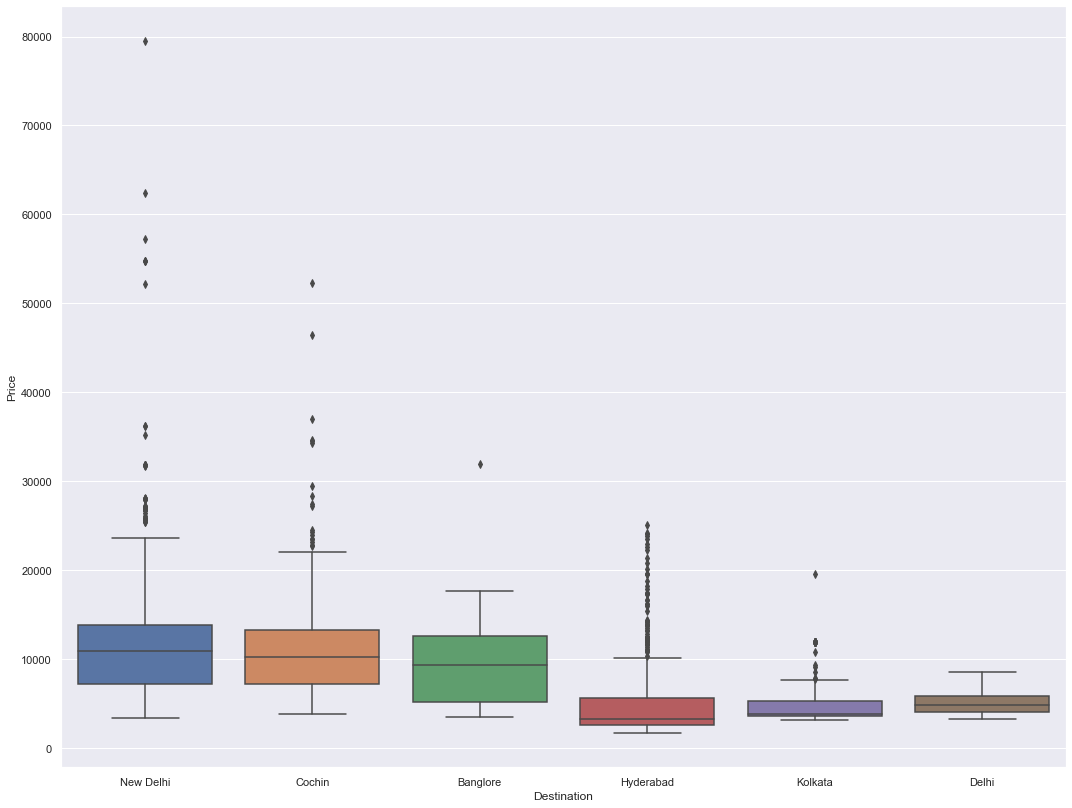

In [277]:
plt.figure(figsize=(18,14))
sns.boxplot(x='Destination', y='Price', data=train_data.sort_values('Price', ascending=False))

In [308]:
Destination = pd.get_dummies(train_data['Destination'], drop_first=True)

In [309]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [237]:
# Total stops is a categorical variable but it is an ordinal categorical variable, the number of stops matter

train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

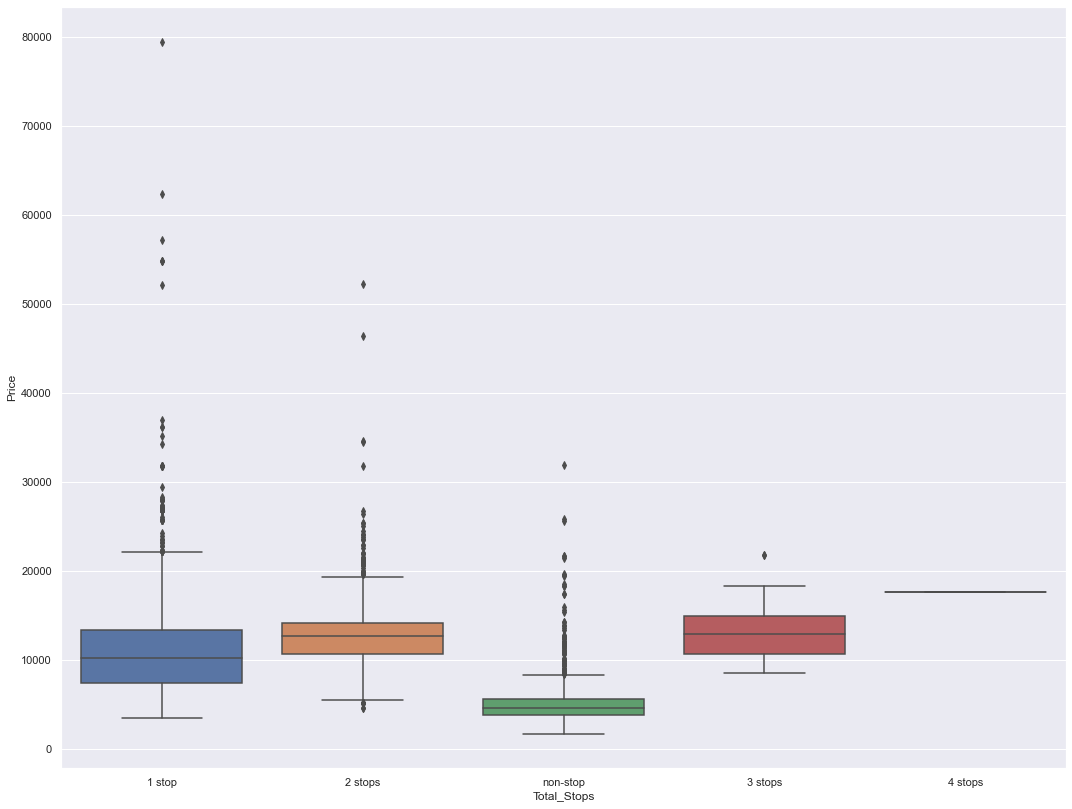

In [281]:
plt.figure(figsize=(18,14))
sns.boxplot(x='Total_Stops', y='Price', data=train_data.sort_values('Price', ascending=False))

In [310]:
ord_dict = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3 , '4 stops': 4}
train_data['Total_Stops'].replace(ord_dict, inplace=True)

In [312]:
train_data = pd.concat([train_data, Airline, Source, Destination], axis=1)

In [314]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [280]:
# We have random values under R0ute and they are not unique as well, neither categorical. So delete this
train_data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [238]:
# Similarly for Additional_Info column as well. So we will delete this
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [315]:
# Drop the columns that we no longer need

train_data.drop(['Airline', 'Source', 'Destination', 'Additional_Info', 'Route'], axis=1, inplace=True)

In [316]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1




Now all the columns are of numberical type and thus will be helpful to make our model more efficient